In [1]:
import numpy as np
from abc import ABC, abstractmethod

import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
class objective_func(ABC):
    @abstractmethod
    def func(self, x):
        pass
    @abstractmethod
    def dfunc(self, x):
        pass
    @abstractmethod
    def get_optimal(self):
        pass
    @abstractmethod
    def get_optimum(self):
        pass
    def visualise2d(self, lim, n):
        x, y = np.linspace(-lim, lim, n), np.linspace(-lim, lim, n)
        xx, yy = np.meshgrid(x, y)
        zz = np.zeros(xx.shape)
        for j in range(n):
            for i in range(n):
                zz[j, i] = self.func((x[i], y[j]))
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.scatter(x=xx.ravel(), y=yy.ravel(), c=zz.ravel())
        ax.scatter(x=[self.optimal[0]], y=[self.optimal[1]], c='red', marker='x')
        fig.show()
        return ax
    def visualise3d(self, lim, n):
        x, y = np.linspace(-lim, lim, n), np.linspace(-lim, lim, n)
        z = []
        for i in y:
            z_line = []
            for j in x:
                z_line.append(self.func([j,i]))
            z.append(z_line)
        fig = go.Figure(data=[go.Surface(z=z, x=x, y=y),  \
                              go.Scatter3d(x=[self.optimal[0]], y=[self.optimal[1]], z=[self.optimum])])
        fig.update_layout(autosize=False,
                          scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                          width=500, height=500,
                          margin=dict(l=65, r=50, b=65, t=90))
        fig.show()
    def visulise_gradient(self, lim, n):
        x, y = np.linspace(-lim, lim, n), np.linspace(-lim, lim, n)
        xx, yy = np.meshgrid(x, y)
        zz = np.zeros((n, n, 2))
        for j in range(len(y)):
            for i in range(len(x)):
                zz[j, i, :] = self.dfunc([x[i], y[j]])
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        ax.quiver(xx,yy,zz[:,:,0],zz[:,:,1])
        ax.scatter(x=[self.optimal[0]], y=[self.optimal[1]], c='red', marker='x')
        fig.show()
        return ax

### Ackley function
\begin{equation*}
f(x) = -20 \exp \left( -\frac{1}{5}\sqrt{ \frac{1}{2} \sum_{i=1}^{2} x_i^2 }\right) -
\exp\left( \frac{1}{2} \sum_{i=1}^{2} \cos\left(2\pi x_i \right) \right) + 20 + e, \\
f'(x) = \left( g\left(x_1\right), \;\; g\left(x_2\right)\right), \\
g(x_j) = 2\frac{x_j}{\sqrt{ \frac{1}{2} \sum_{i=1}^{2} x_i^2 } } 
\exp \left( -\frac{1}{5}\sqrt{ \frac{1}{2} \sum_{i=1}^{2} x_i^2 }\right) +
\pi \sin(2\pi x_j) \exp\left( \frac{1}{2} \sum_{i=1}^{2} \cos\left(2\pi x_i \right) \right),\\
f^*(x^*)=0, x^*=(0,0)
\end{equation*}

In [18]:
class ackley(objective_func):
    def __init__(self):
        self.optimal = np.array([0, 0])
        self.optimum = 0
    def func(self, x):
        '''
        the period of local minimum along each axis is 1, integer coordinate (1,1), (2,3)... 
        x and y is interchangeable
        global minimum is 0 with arguments x=y=0
        local minimums far away from orgin are 20
        supremum is 20 + e - 1/e = 22.35
        symmetric along x=0, y=0, y=x lines
        disappearing global gradient when far away from optimal
        '''
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
    def dfunc(self, x):
        if x[0] == 0 and x[1] == 0: 
            return x
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        g = lambda xx: -0.4 * xx / arg1 * np.exp(arg1) + np.pi * np.sin(2 * np.pi * xx) * np.exp(arg2)
        return np.array([g(x[0]), g(x[1])])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
a = ackley()
print("check func value: expected:", a.get_optimum(), ", actual:", a.func(a.get_optimal()))
print("check gradient: expected:[0,0], actual:",a.dfunc(a.get_optimal()))

check func value: expected: 0 , actual: 4.440892098500626e-16
check gradient: expected:[0,0], actual: [0 0]


<IPython.core.display.Javascript object>


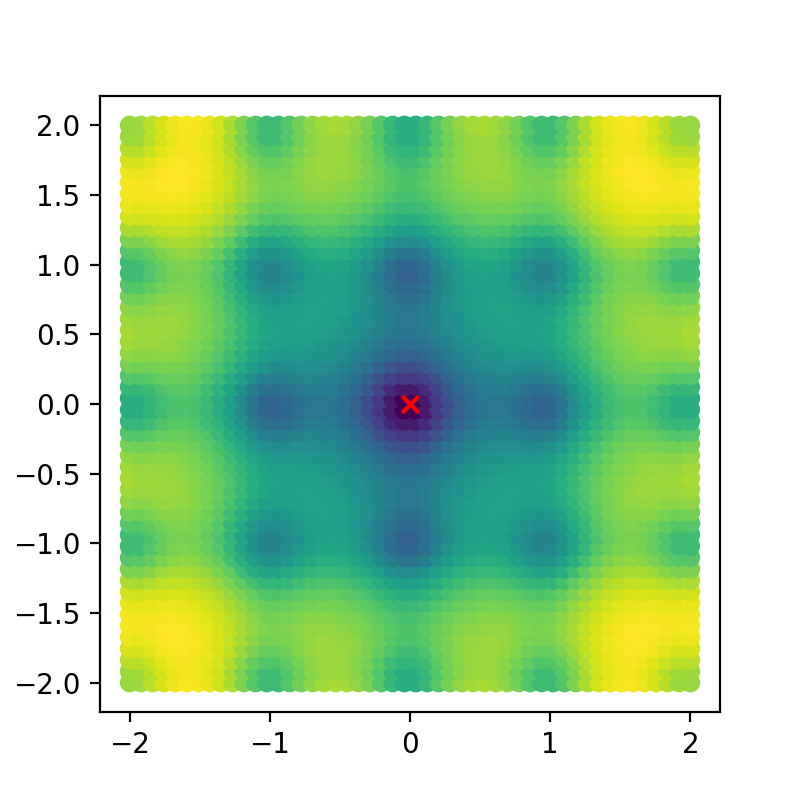

In [15]:
a.visualise2d(lim=2, n=50)

In [16]:
a.visualise3d(lim=2, n=50)

<IPython.core.display.Javascript object>


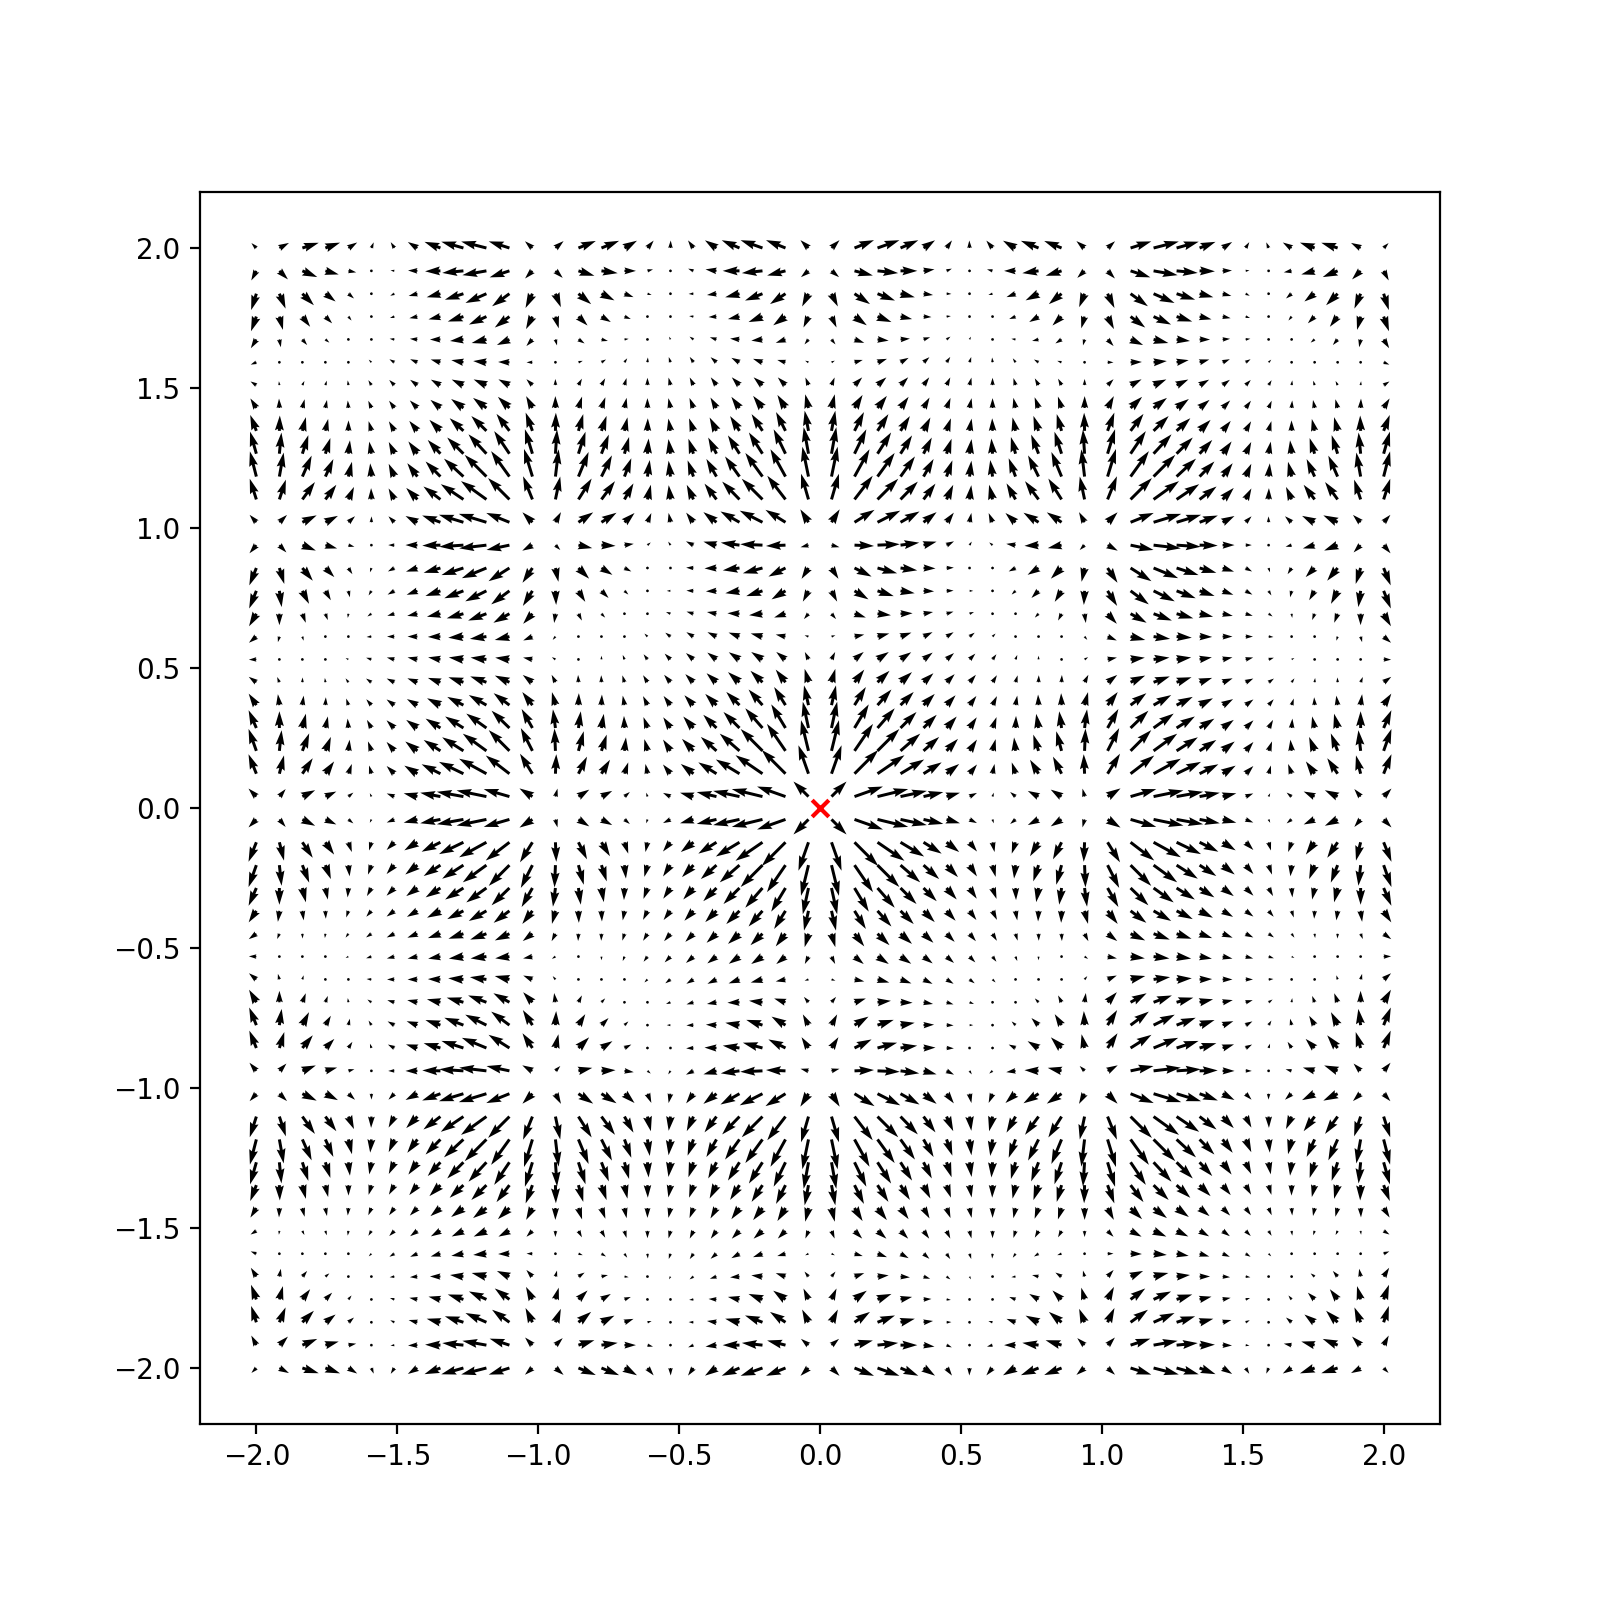

In [17]:
a.visulise_gradient(lim=2, n=50)

### bukin function
\begin{equation*}
f(x) = 100 \sqrt{\left|x_2 - 0.01x_1^2\right|} + 0.01\left|x_1 + 10\right| \\
f'(x) = \left(-x_1\frac{1}{\sqrt{\left|x_2 - 0.01x_1^2\right|}} sgn(x_2 - 0.01x_1^2) + 0.01 sgn(x_1+10), \;\;
\frac{50}{\sqrt{\left|x_2 - 0.01x_1^2\right|}} sgn(x_2 - 0.01x_1^2) \right) \\
f^*(x^*) = 0, x^*=(-10, 1)
\end{equation*}

In [19]:
class bukin(objective_func):
    '''
    non-disappearing gradient
    large gradient and uncontinuous gradient around ridge/local optimal
    optimum: 0
    optimal: (-10, 1)
    '''
    def __init__(self):
        self.optimal = np.array([-10, 1])
        self.optimum = 0
    def func(self, x):
        return 100 * np.sqrt(np.abs(x[1] - 0.01 * x[0]**2)) + 0.01 * np.abs(x[0] + 10)
    def dfunc(self, x):
        arg1 = x[1] - 0.01 * x[0]**2
        arg2 = 50 / np.sqrt(np.abs(arg1)) * np.sign(arg1) if arg1 != 0 else 0
        return np.array([- 0.02 * x[1] * arg2 + 0.01 * np.sign(x[0] + 10), arg2])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
b = bukin()
print("check func value: expected:", b.get_optimum(), ", actual:", b.func(a.get_optimal()))
print("check gradient: expected:[0,0], actual:", b.dfunc(a.get_optimal()))

check func value: expected: 0 , actual: 0.1
check gradient: expected:[0,0], actual: [0.01 0.  ]


<IPython.core.display.Javascript object>


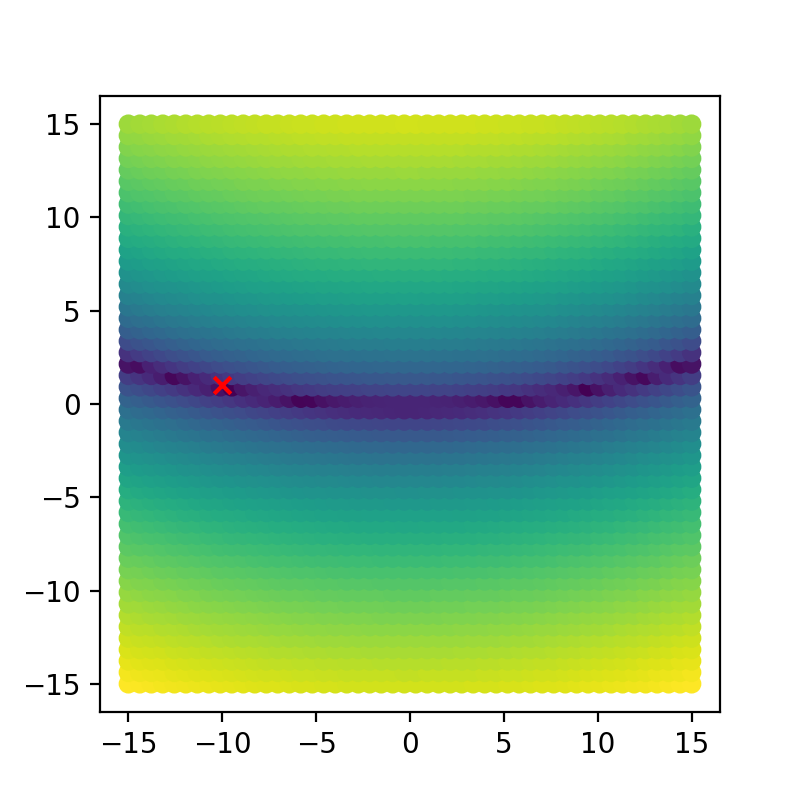

In [19]:
b.visualise2d(lim=15, n=50)

In [20]:
b.visualise3d(lim=15, n=30)

<IPython.core.display.Javascript object>


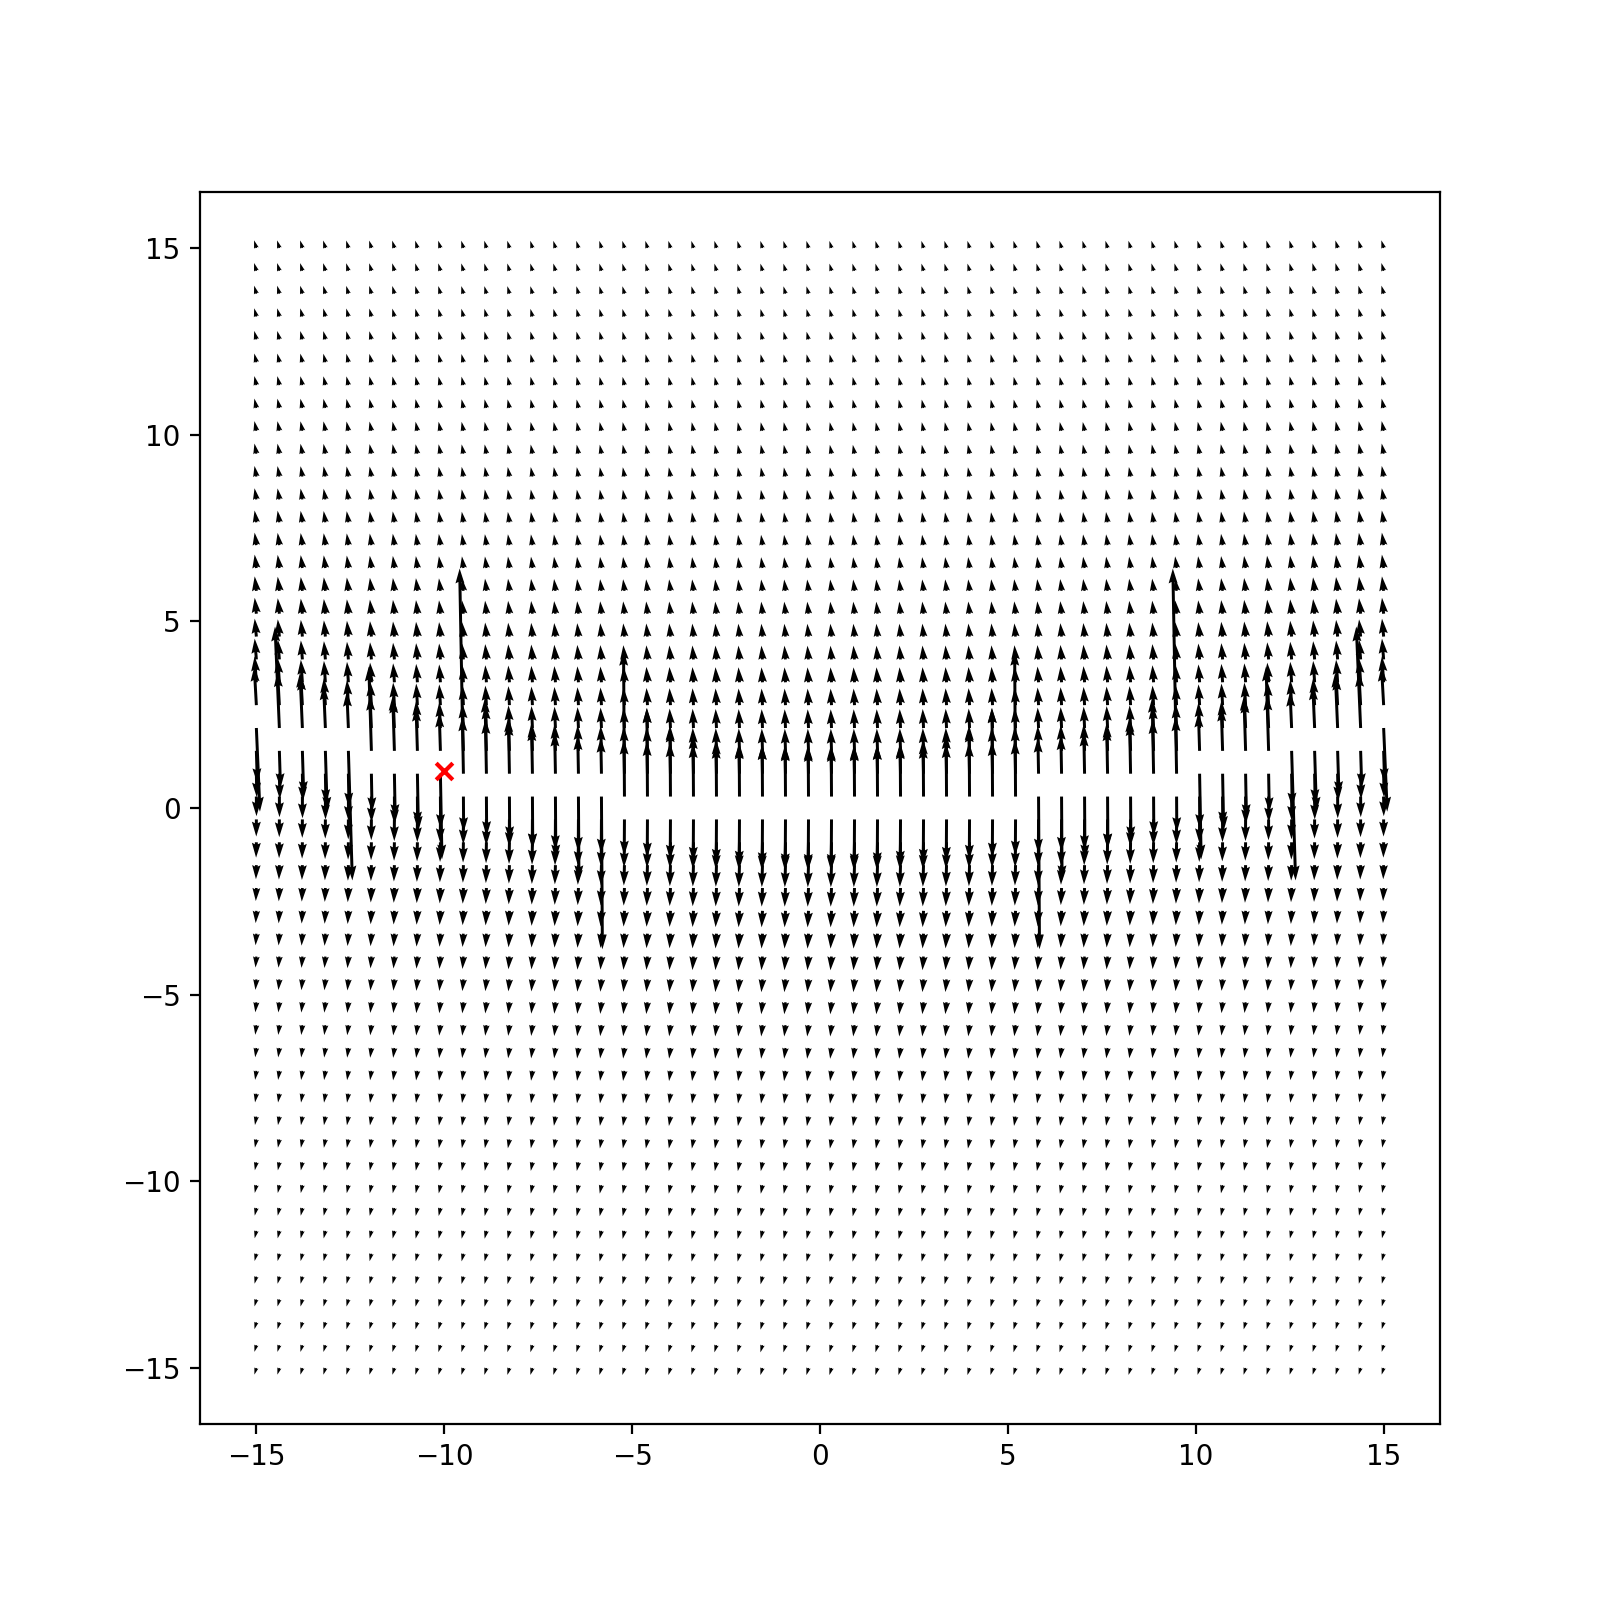

In [20]:
b.visulise_gradient(lim=15, n=50)

### eggholder function

\begin{equation*}
f(x) = -\left( x_2 + 47 \right) \sin\left( \sqrt{\left|\frac{x_1}{2} + (x_2 + 47)\right|} \right) -
x_1\sin\left( \sqrt{\left|x_1 - \left(x_2 + 47\right)\right|} \right), \\|x_1|, |x_2| \leq 512\\
f'(x) = \left(-\sin \left( \sqrt{\left| x'_2 \right|} \right) - \frac{1}{2}(x_2 + 47)g(x'_1) - x_1 g(x'_2)     ,\;\; -\sin \left( \sqrt{\left| x'_1 \right|} \right) - (x_2 + 47)g(x'_1) + x_1 g(x'_2)   \right)\\
g(x'_j) = \cos\left( \sqrt{\left|x'_j\right|} \right) \frac{1}{2\sqrt{\left|x'_j\right|}} sgn(x'_j)  \\
x'_1 = \frac{x_1}{2} + (x_2 + 47), \\
x'_2 = x_1 - (x_2 + 47)\\
f^*(x^*)=-959.6407, x^*=(512, 404.2319)
\end{equation*}





In [40]:
class eggholder(objective_func):
    # evaluated domain: 
    def __init__(self):
        self.optimal = np.array([512, 404.2319])
        self.optimum = -959.6407
    def func(self, x):
        if np.abs(x[0]) > 512 or np.abs(x[1]) > 512:
            return 1e3
        arg1 = x[0]/2 + (x[1] + 47) 
        arg2 = x[0]   - (x[1] + 47)
        f = lambda xx: np.sin(np.sqrt(np.abs(xx)))
        return -(x[1] + 47) * f(arg1) - x[0] * f(arg2)
    def dfunc(self, x):
        arg1 = x[0]/2 + (x[1] + 47) 
        arg2 = x[0]   - (x[1] + 47)
        g = lambda xx: np.cos(np.sqrt(np.abs(xx)))/np.sqrt(np.abs(xx))/2*np.sign(xx)
        f1 = (x[1] + 47) * g(arg1)
        f2 = x[0] * g(arg2)
        return np.array([-f1/2 - np.sin(arg2) - f2, \
                         -f1   - np.sin(arg1) + f2])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
e = eggholder()
e.get_optimal()
print("check func value: expected:", e.get_optimum(), ", actual:", e.func(e.get_optimal()))
print("check gradient: expected:[0,0], actual:", e.dfunc(e.get_optimal()))

check func value: expected: -959.6407 , actual: -959.6406627106155
check gradient: expected:[0,0], actual: [-1.50654308  1.35912976]


In [37]:
e.visualise3d(lim=600, n=100)

<IPython.core.display.Javascript object>


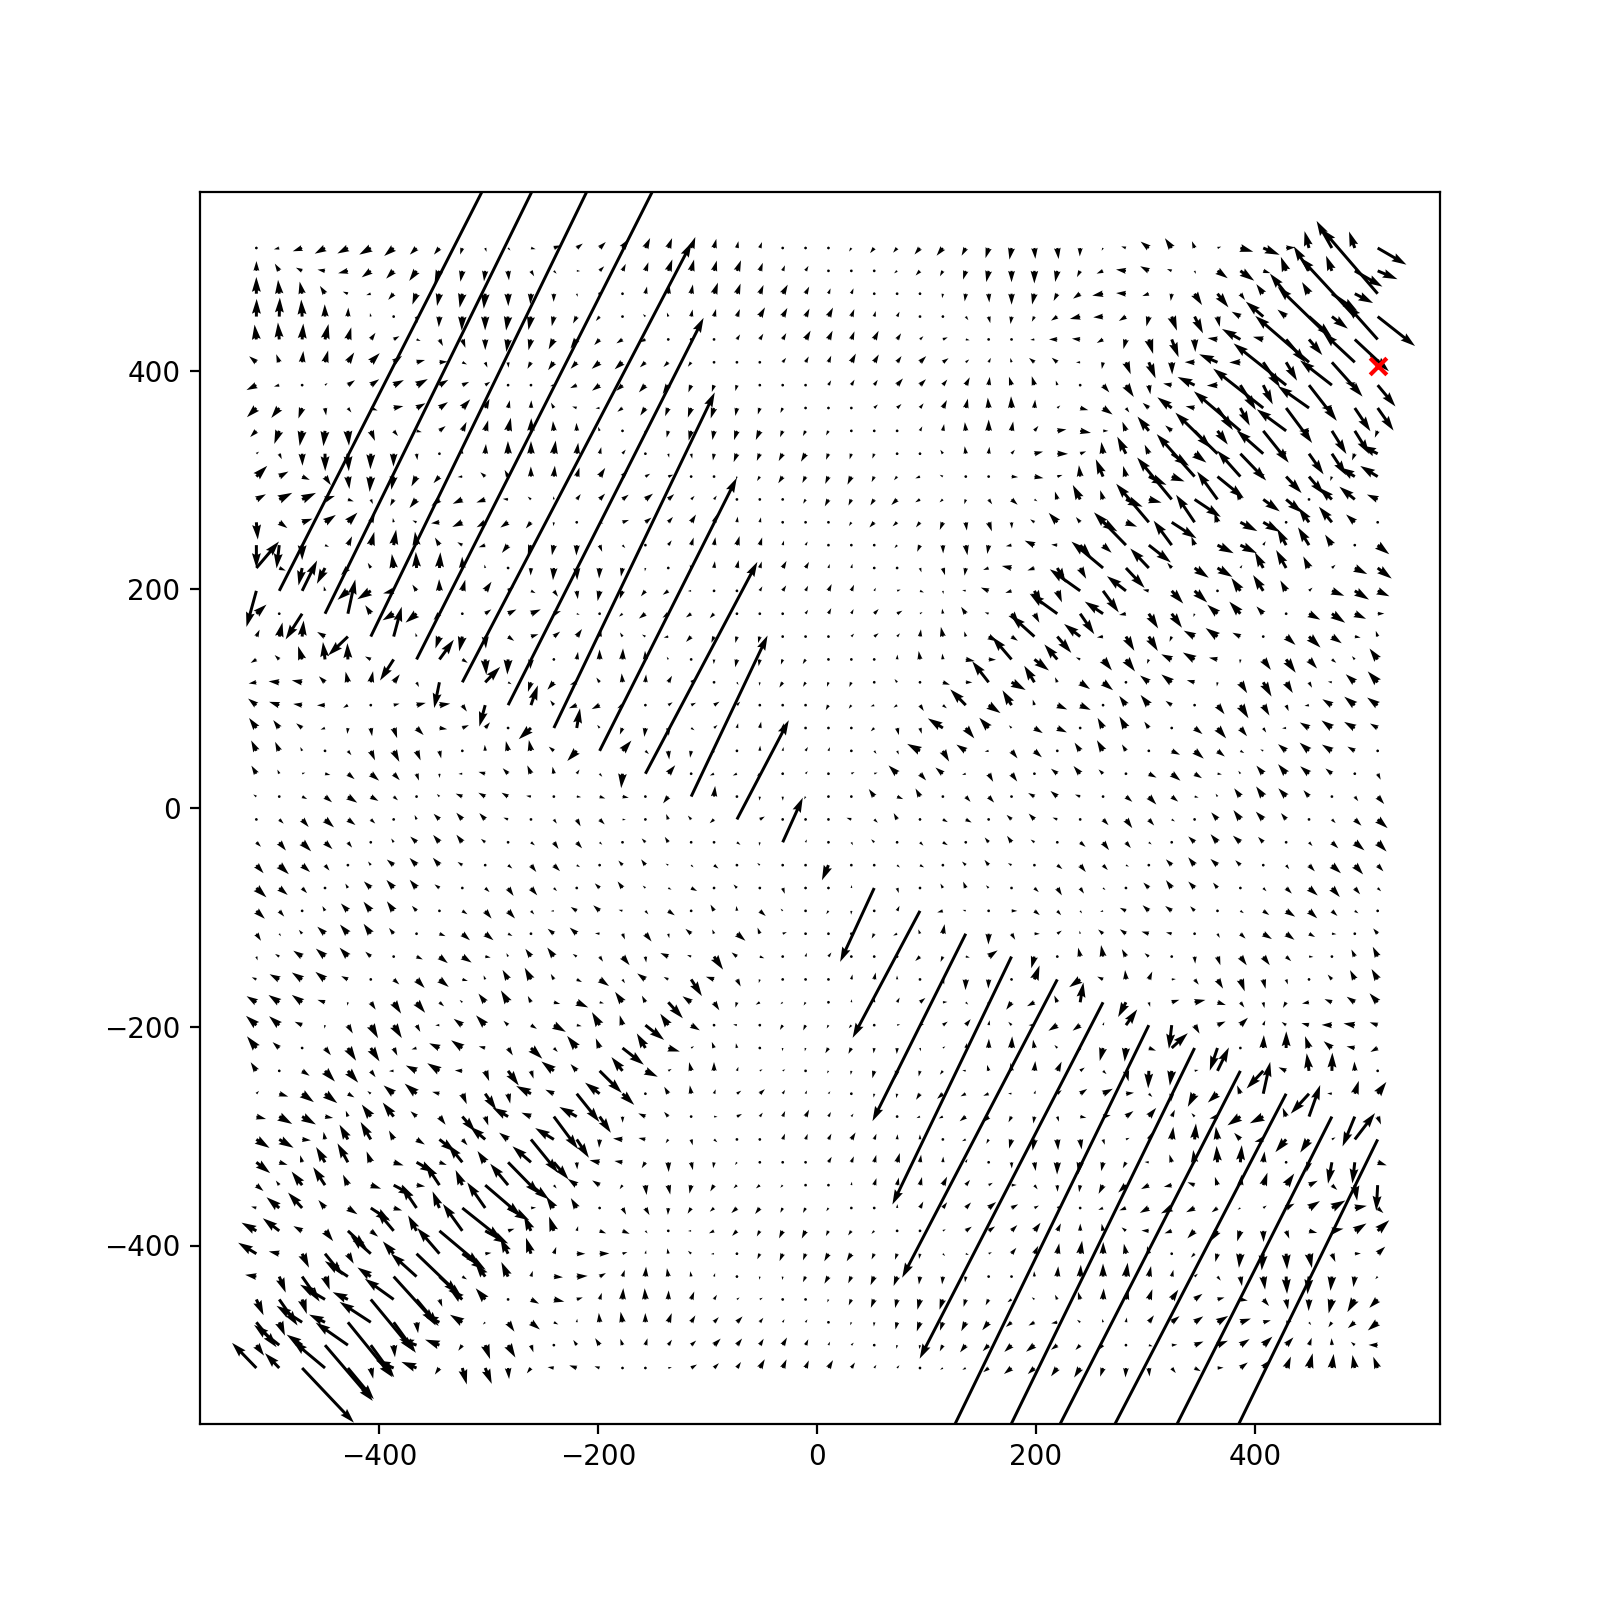

In [26]:
e.visulise_gradient(lim=512, n=50)

### tuned Ackley function
\begin{equation*}
f(x) = -20 \exp\left(-\frac{1}{5} \sqrt{\frac{1}{2}\sum_{i=1}^2 x_i^2}\right) - \frac{1}{10}\left(-\frac{1}{5} \sqrt{\frac{1}{2}\sum_{i=1}^2 x_i^2}\right)^4  \exp\left( \frac{1}{2}\sum_{i=1}^2 \cos\left( 2\pi x_i\right)\right) + 20 + e\\
f'(x) = \left( g\left(x_1\right), \;\; g\left(x_2\right)\right), \\
g(x_j) = 2\frac{x_j}{\sqrt{ \frac{1}{2} \sum_{i=1}^{2} x_i^2 } } \exp \left( -\frac{1}{5}\sqrt{ \frac{1}{2} \sum_{i=1}^{2} x_i^2 }\right) \\+ \frac{\pi}{100}\left(-\frac{1}{5} \sqrt{\frac{1}{2}\sum_{i=1}^2 x_i^2}\right)^4 \sin(2\pi x_j) \exp\left( \frac{1}{2} \sum_{i=1}^{2} \cos\left(2\pi x_i \right) \right)\\-\frac{1}{6250}\exp\left( \frac{1}{2} \sum_{i=1}^{2} \cos\left(2\pi x_i \right) \right) \left(\sum_{i=1}^{2} x_i^2\right) x_j \\
f^*(x^*) = e, x^*=(0,0)
\end{equation*}


In [42]:
class tuned_ackley(objective_func):
    # evaluated domain: circle with radius 19
    def __init__(self, radius=19):
        self.optimal = np.array([0, 0])
        self.optimum = np.e
        self.radius = radius
    def func(self, x):
        '''
        the period of local minimum along each axis is 1, integer coordinate (1,1), (2,3)... 
        x and y is interchangeable
        global minimum is 0 with arguments x=y=0
        local minimums far away from orgin are 20
        supremum is 20 + e - 1/e = 22.35
        symmetric along x=0, y=0, y=x lines
        disappearing global gradient when far away from optimal
        '''
        if np.linalg.norm(x) > self.radius:
            return 5e1
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        return -20. * np.exp(arg1) - 0.1 * arg1**4 * np.exp(arg2) + 20. + np.e
    def dfunc(self, x):
        if x[0] == 0 and x[1] == 0: 
            return np.array([0, 0])
        elif np.linalg.norm(x) > self.radius:
            return np.array([0, 0])
        arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
        arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
        g = lambda xx: -0.4 * xx / arg1 * np.exp(arg1) + np.pi/10 * arg1**4 * np.sin(2 * np.pi * xx) * np.exp(arg2) \
                         - xx/6250 * np.exp(arg2) * (x[0]**2 + x[1]**2)
        return np.array([g(x[0]), g(x[1])])
    def get_optimal(self):
        return self.optimal
    def get_optimum(self):
        return self.optimum
at = tuned_ackley()
print("check func value at optimal is", at.get_optimum(), "(optimuam): ", at.func(at.get_optimal()))
print("check gradient is (0,0): ",at.dfunc(at.get_optimal()))

check func value at optimal is 2.718281828459045 (optimuam):  2.718281828459045
check gradient is (0,0):  [0 0]


In [121]:
at.func((19,0))

7.186623677541611

In [108]:
at.visualise3d(lim=22, n=150)

<IPython.core.display.Javascript object>


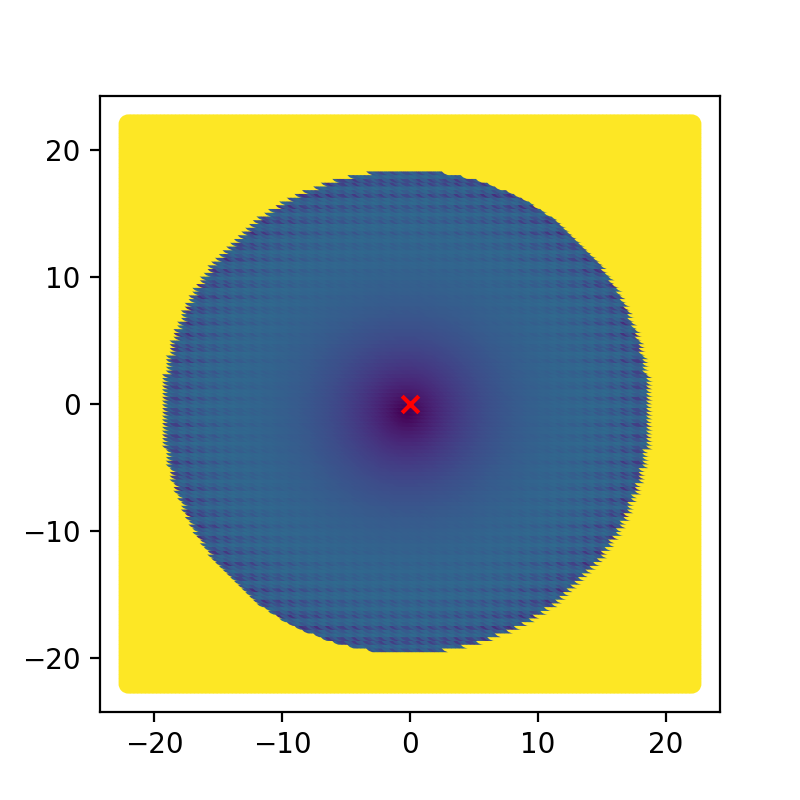

In [43]:
at.visualise2d(lim=22, n=150)

<IPython.core.display.Javascript object>


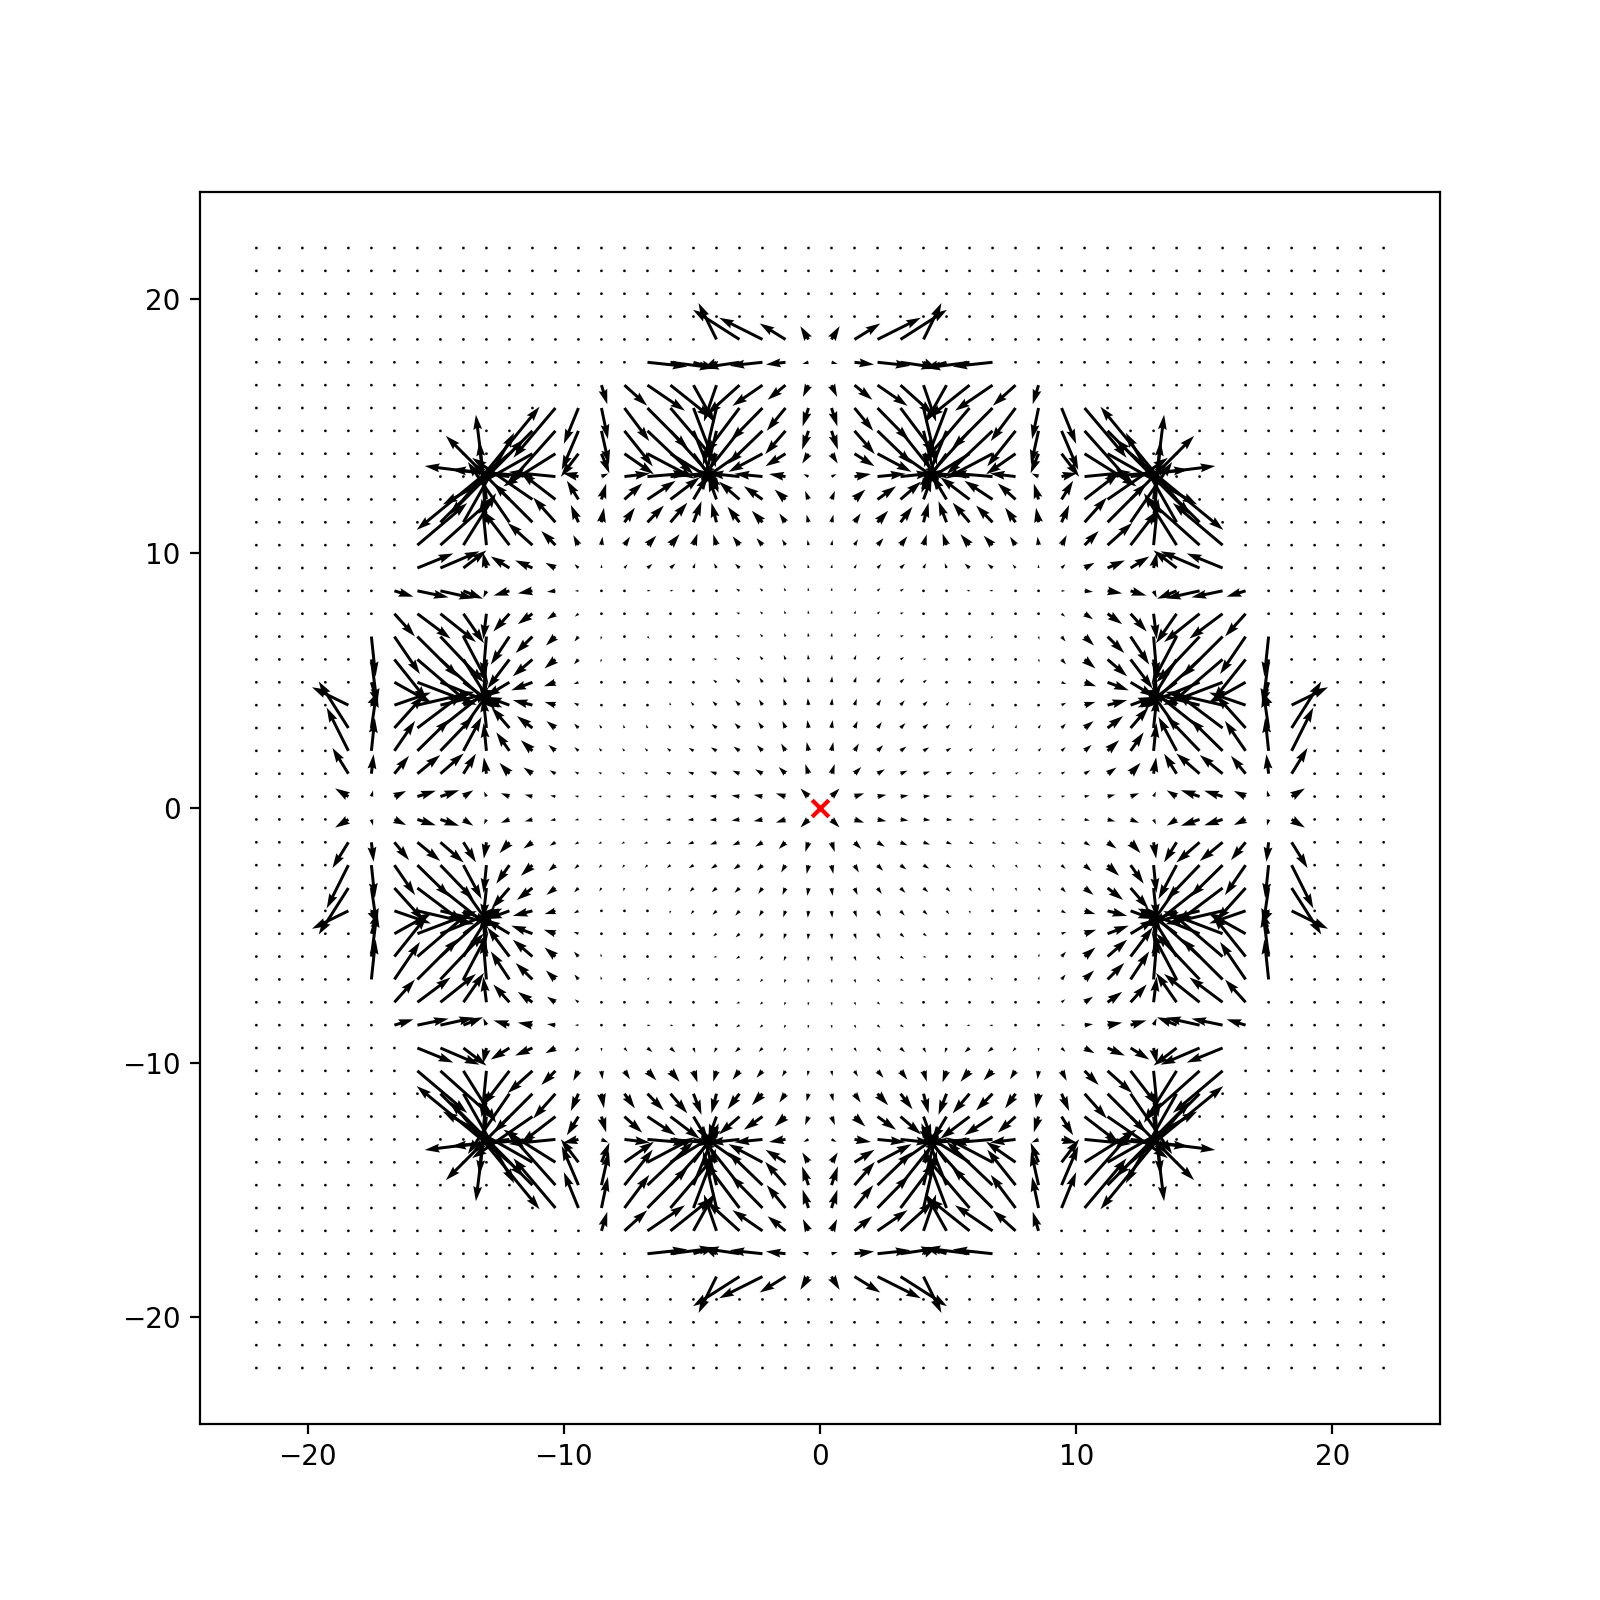

In [49]:
at.visulise_gradient(lim=22, n=50)